## Import required libraries

In [1]:
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## Define the ticker and the date range

In [2]:
ticker = "AAPL"
start_date = dt.datetime.now() - dt.timedelta(days=252)
end_date = dt.datetime.now()

## Download the historical data for the ticker

In [3]:
data = yf.download(ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


## Calculate the VWAP for the data

In [4]:
data['TP'] = (data['High'] + data['Low'] + data['Close']) / 3
data['TPV'] = data['TP'] * data['Volume']
data['Cumulative TPV'] = data['TPV'].cumsum()
data['Cumulative Volume'] = data['Volume'].cumsum()
data['VWAP'] = data['Cumulative TPV'] / data['Cumulative Volume']

## Define the trading signal

In [5]:
data['Signal'] = [1 if data['Close'][i] > data['VWAP'][i] else -1 for i in range(len(data))]

## Calculate the returns

In [6]:
data['Returns'] = data['Close'].pct_change()
data['Strategy Returns'] = data['Returns'] * data['Signal'].shift(1)

## Calculate the number of positive and negative trades

In [7]:
data['Positive Trades'] = [1 if data['Strategy Returns'][i] > 0 else 0 for i in range(len(data))]
data['Negative Trades'] = [1 if data['Strategy Returns'][i] < 0 else 0 for i in range(len(data))]

## Calculate the cumulative returns

In [8]:
data['Cumulative Returns'] = (data['Strategy Returns'] + 1).cumprod()

## Plot the cumulative returns

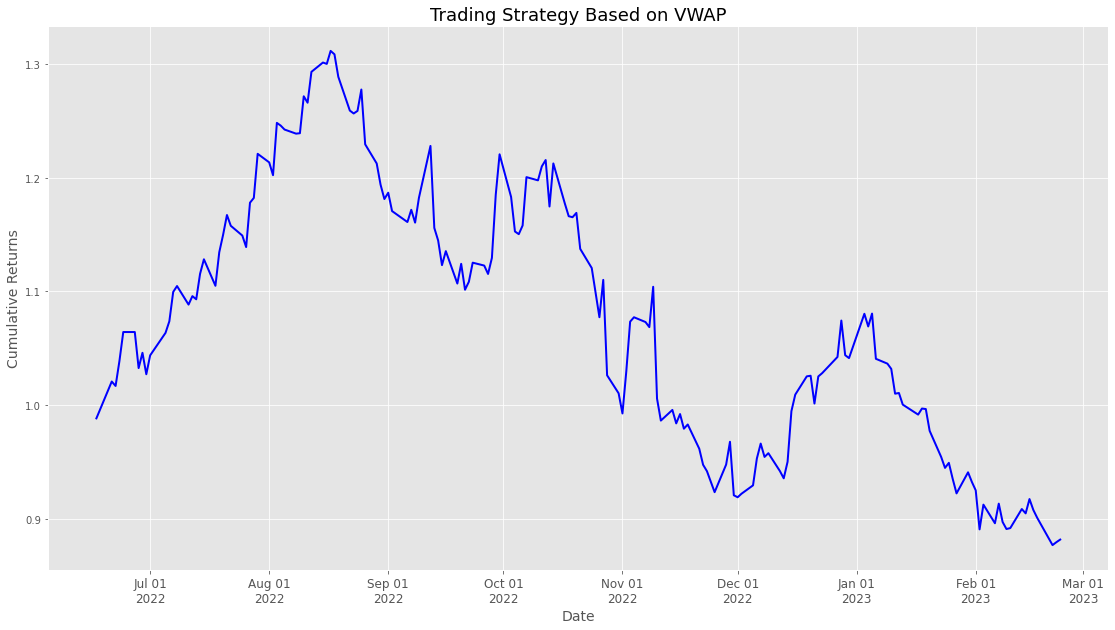

In [13]:
fig, ax = plt.subplots(figsize=(19, 10))
ax.plot(data['Cumulative Returns'], linewidth=2, color='blue')

# Add axis labels and a title
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Cumulative Returns', fontsize=14)
ax.set_title('Trading Strategy Based on VWAP', fontsize=18)

# Customize the x-axis ticks
date_format = '%b %d\n%Y'
date_formatter = plt.matplotlib.dates.DateFormatter(date_format)
ax.xaxis.set_major_formatter(date_formatter)
ax.xaxis.set_tick_params(labelsize=12)

# Show the grid lines
ax.grid(True)

# Show the plot
plt.show()

## Print the number of positive and negative trades

In [10]:
print("Number of Positive Trades:", data['Positive Trades'].sum())
print("Number of Negative Trades:", data['Negative Trades'].sum())

Number of Positive Trades: 80
Number of Negative Trades: 91
